# Covid19 Analysis of Austria by Using Python

### [Azeem Khadam](azeem.khadam@uni-graz.at)

### October 2021

-------

## Required packages

In this file we are going to analyse the Covid19 in Austria by using [Python](https://www.python.org/). In particular we use Python's packages [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/) and [Matplotlib.pyplot](https://matplotlib.org/). First we import these packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data set


Now we load the data set. We specifically use the package `pandas` and its function `read_csv()`. Note that in German notation, a comma `,` is used to separate the decimal part of a (rational) number (not the dot `.`). So the delimiter used by `csv` files is the semicolon `;` (not the usual `,`) and to read such a `csv` file the function `read_csv` works only when we add the argument `sep = ';'` (note that by default `sep` is set as `,`).

In [2]:
covid = pd.read_csv("CovidFaelle_Timeline.csv", sep=';')

**Note:** The source of data is the dashboard of [Austrian Agency of Health and Food Security](https://covid19-dashboard.ages.at).

We now see some information about our dataset, in parlicular its dimensions using the function `info()`.

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Time                      6050 non-null   object
 1   Bundesland                6050 non-null   object
 2   BundeslandID              6050 non-null   int64 
 3   AnzEinwohner              6050 non-null   int64 
 4   AnzahlFaelle              6050 non-null   int64 
 5   AnzahlFaelleSum           6050 non-null   int64 
 6   AnzahlFaelle7Tage         6050 non-null   int64 
 7   SiebenTageInzidenzFaelle  6050 non-null   object
 8   AnzahlTotTaeglich         6050 non-null   int64 
 9   AnzahlTotSum              6050 non-null   int64 
 10  AnzahlGeheiltTaeglich     6050 non-null   int64 
 11  AnzahlGeheiltSum          6050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 567.3+ KB


There are 12 columns and 5920 rows. Also, if we look at the data types of each column, we observe that the data type of the column `SiebenTageInzidenzFaelle` is `object` although it contains the numerical values. Here the reason is again that in German notation, a `,` is used as a delimiter. So we convert it into a numeric value first.

In [4]:
# to change the data type of the column SiebenTageInzidenzFaelle
covid.SiebenTageInzidenzFaelle = [x.replace(',', '.') for x in covid.SiebenTageInzidenzFaelle ]
covid.SiebenTageInzidenzFaelle = pd.to_numeric(covid.SiebenTageInzidenzFaelle)

# to see the data types of each column
covid.dtypes

Time                         object
Bundesland                   object
BundeslandID                  int64
AnzEinwohner                  int64
AnzahlFaelle                  int64
AnzahlFaelleSum               int64
AnzahlFaelle7Tage             int64
SiebenTageInzidenzFaelle    float64
AnzahlTotTaeglich             int64
AnzahlTotSum                  int64
AnzahlGeheiltTaeglich         int64
AnzahlGeheiltSum              int64
dtype: object

## Dive into analysis...

Since our data is now raedy, we look at the first ten rows of the table.

In [5]:
covid.head(10)

,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
0,26.02.2020 00:00:00,Burgenland,1,296010,0,0,0,0.000000,0,0,0,0
1,26.02.2020 00:00:00,Kärnten,2,562089,0,0,0,0.000000,0,0,0,0
2,26.02.2020 00:00:00,Niederösterreich,3,1690879,0,0,0,0.000000,0,0,0,0
3,26.02.2020 00:00:00,Oberösterreich,4,1495608,0,0,0,0.000000,0,0,0,0
4,26.02.2020 00:00:00,Salzburg,5,560710,0,0,0,0.000000,0,0,0,0
5,26.02.2020 00:00:00,Steiermark,6,1247077,0,0,0,0.000000,0,0,0,0
6,26.02.2020 00:00:00,Tirol,7,760105,0,0,0,0.000000,0,0,0,0
7,26.02.2020 00:00:00,Vorarlberg,8,399237,0,0,0,0.000000,0,0,0,0
8,26.02.2020 00:00:00,Wien,9,1920949,1,1,1,0.052058,0,0,0,0
9,26.02.2020 00:00:00,Österreich,10,8932664,1,1,1,0.011195,0,0,0,0


The above output shows that it is a data of February 26, 2020 and first 9 rows correspond to each State of Austria while the 10th row corresponds to Austria itself. Let us also see the last 10 rows. We are going to use the 'slicing' method here. Alternatively, we can also use the `tail()` function or even `iloc` method.

In [6]:
covid[-10 : ]

,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
6040,22.10.2021 00:00:00,Burgenland,1,296010,69,21012,426,143.9141,1,341,29,20057
6041,22.10.2021 00:00:00,Kärnten,2,562089,206,47370,1229,218.6487,0,853,94,44967
6042,22.10.2021 00:00:00,Niederösterreich,3,1690879,740,132465,4497,265.9564,0,1738,365,124055
6043,22.10.2021 00:00:00,Oberösterreich,4,1495608,911,148840,5161,345.0771,1,1745,345,139288
6044,22.10.2021 00:00:00,Salzburg,5,560710,297,61746,2026,361.3276,0,626,155,58252
6045,22.10.2021 00:00:00,Steiermark,6,1247077,460,97022,2777,222.6807,0,2165,291,90776
6046,22.10.2021 00:00:00,Tirol,7,760105,312,73108,1658,218.1278,0,727,172,70399
6047,22.10.2021 00:00:00,Vorarlberg,8,399237,110,35347,594,148.7838,0,326,36,34198
6048,22.10.2021 00:00:00,Wien,9,1920949,528,174800,3389,176.4232,1,2474,348,161515
6049,22.10.2021 00:00:00,Österreich,10,8932664,3633,791710,21757,243.5668,3,10995,1835,743507


The above output shows us the covid19 situtaion from October 22, 2021. We can already see some initial information from our dataset. If we look at the column `AnzahlTotTaeglich`, three people were died in Austria on that day (one in the state of Burgenland, the second in Oberösterreich and the third one in Wien). Moreover, so far the total number of deaths in Austria is 10995 (which can be seen in the column `AnzahlTotSum`), whereras a state with most of deaths is Wien (where total deaths are 2474).

We can even get some other descriptive statistical information by using the `describe()` method from `pandas`. Let us look for the whole of Austria only.

In [7]:
# dataset for Austria only
covid_austria = covid[covid.Bundesland == "Österreich"]

# to set the index of rows from 0
covid_austria.reset_index(drop=True, inplace=True)

# descriptive statistics of covid19 in Austria
austria_summary = covid_austria.describe()

# to round to only one decimal
austria_summary.round(1)

,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
count,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0
mean,10.0,8932664.0,1308.6,326601.7,9038.6,101.2,18.2,5390.8,1228.9,303235.0
std,0.0,0.0,1497.7,282516.9,10122.7,113.3,26.6,4446.6,1408.1,272338.9
min,10.0,8932664.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,8932664.0,148.0,20525.0,892.0,10.0,1.0,744.0,143.0,18136.0
50%,10.0,8932664.0,806.0,346731.0,5191.0,58.1,6.0,5987.0,682.0,311767.0
75%,10.0,8932664.0,1976.0,637210.0,13958.0,156.3,24.0,10384.0,1888.0,614902.0
max,10.0,8932664.0,9174.0,791710.0,50251.0,562.6,123.0,10995.0,7643.0,743507.0


Here we can for example see the average of 'Seven Days Incidence' in Austria which is 101.2. The median of the total number of deaths per day is 6. Also, the maximum number of deaths in Austria is 10995 (which we also observed above). Moreover, the total number of so far cases in Austria is 791710, whereas 743507 persons have been recovered.

## Visualization

For the visulaisation we use the package `matplotlib.pyplot` which we already have imported above. We begin by drawing a line graph for the number of covid cases in whole of Austria.

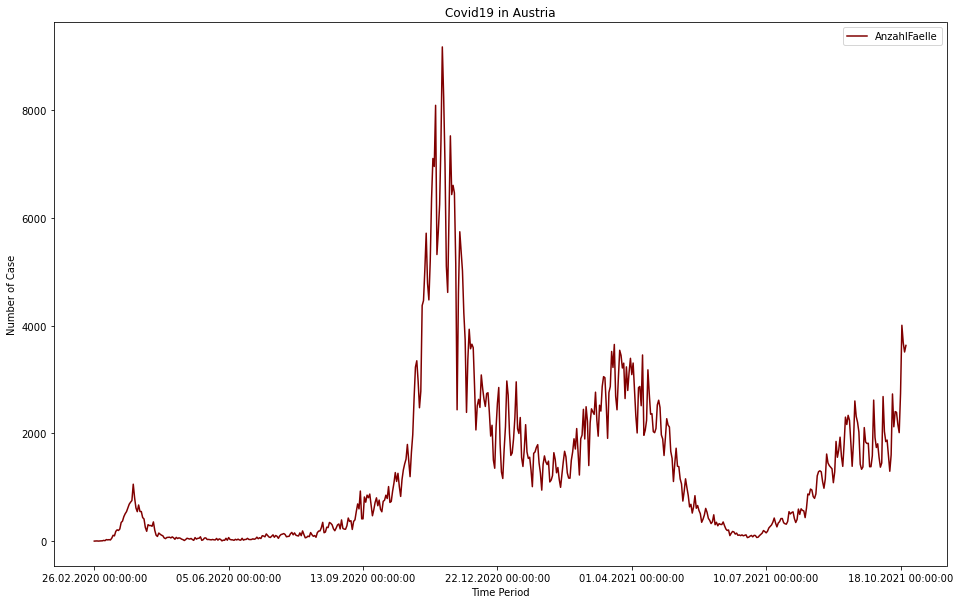

In [8]:
# draw the plot for Austria
plot_austria = covid_austria.plot(x = "Time", y = "AnzahlFaelle", figsize=(16, 10), color='maroon')
plt.title("Covid19 in Austria")
plt.xlabel("Time Period")
plt.ylabel('Number of Case')
plt.show()

We can see that the covid cases are on the rise in the past few days. We can also see that maximum number of cases in one day were about 9000, which we can confirm by using the following:

In [9]:
# the day of maximum number of cases
covid_austria.AnzahlFaelle.max()

9174

Here is the bar chart of covid cases for October 2021.

Text(0, 0.5, 'Number of Case')

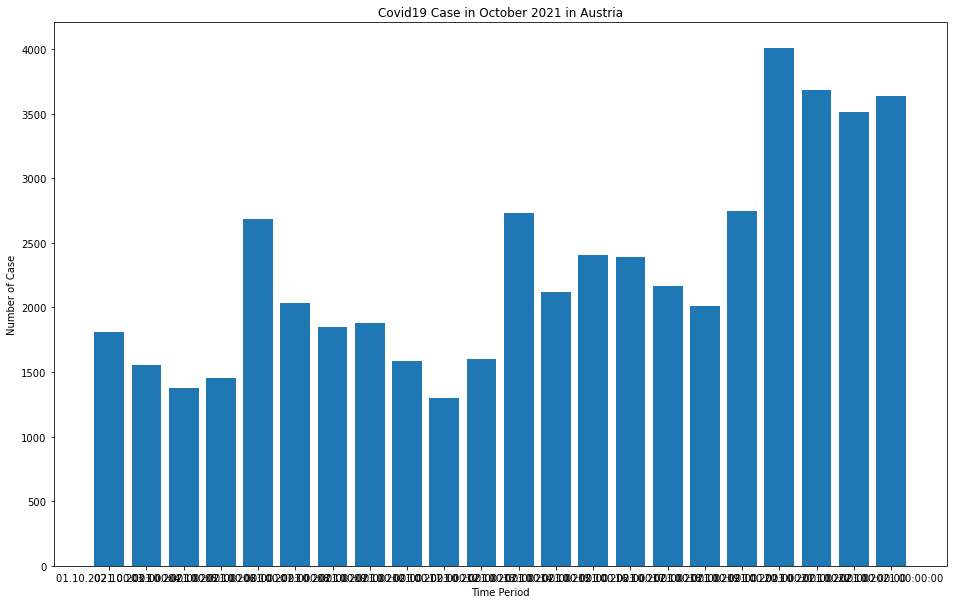

In [10]:
# bar chart of October 2021
fig = plt.figure(figsize = (16, 10))
plt.bar(covid_austria["Time"].tail(22), covid_austria["AnzahlFaelle"].tail(22))
plt.title("Covid19 Case in October 2021 in Austria")
plt.xlabel("Time Period")
plt.ylabel('Number of Case')

Here is a line graph of seven days incidence in Austria:

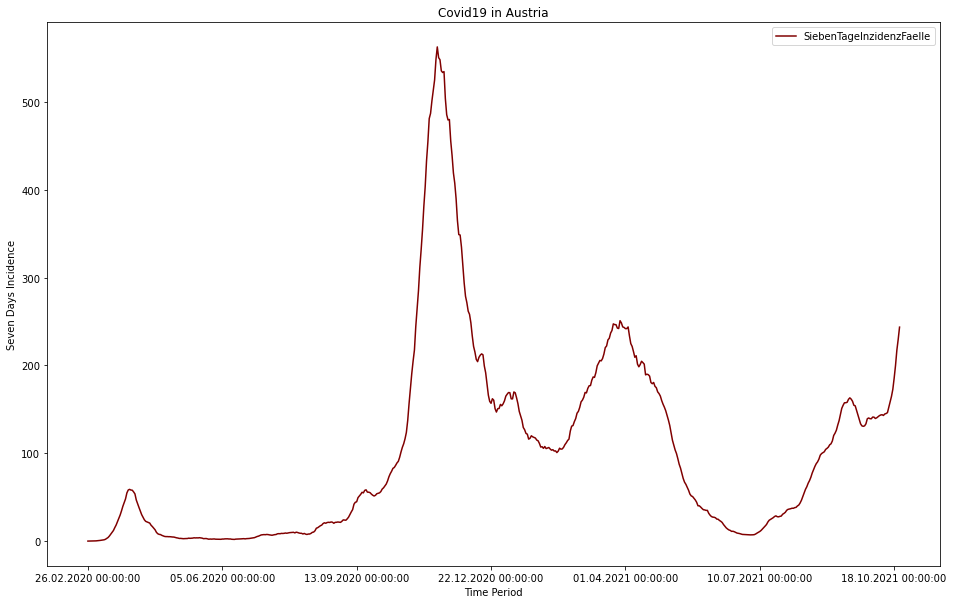

In [11]:
# draw the line graph of seven days incidence in Austria
covid_austria.plot(x = "Time", y = "SiebenTageInzidenzFaelle", figsize=(16, 10), color='maroon')
plt.title("Covid19 in Austria")
plt.xlabel("Time Period")
plt.ylabel('Seven Days Incidence')
plt.show()

We can even combine two line graphs in one plane. Here are the line graphs of daily covid cases and daily recoveries.

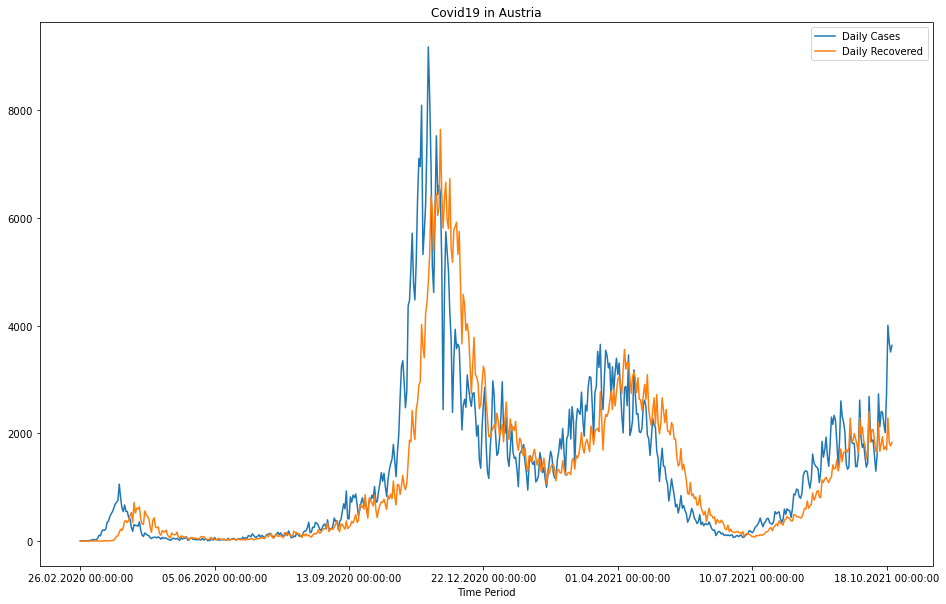

In [12]:
# draw the line graphs of daily cases and recoveries in Austria

covid_cases = covid_austria.plot(x = "Time", y = "AnzahlFaelle", label = "Daily Cases", figsize=(16, 10))
covid_austria.plot(ax = covid_cases, x = "Time", y = "AnzahlGeheiltTaeglich", label = "Daily Recovered", figsize=(16, 10))
plt.legend()
plt.title("Covid19 in Austria")
plt.xlabel("Time Period")
plt.show()

Bar chart of daily deaths:

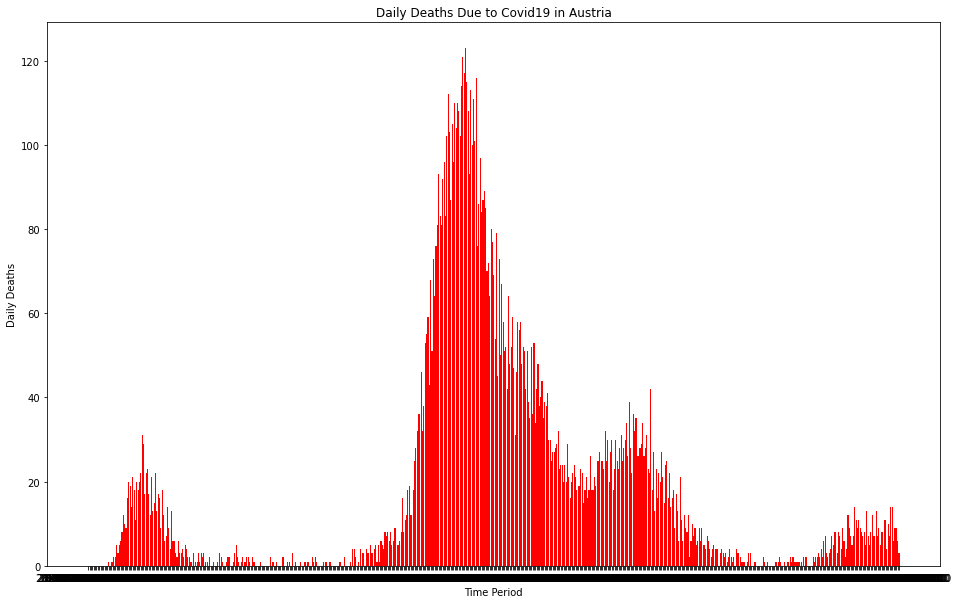

In [16]:
# draw the bar graph of daily deaths in Austria
fig = plt.figure(figsize = (16, 10))
plt.bar(covid_austria.Time, covid_austria.AnzahlTotTaeglich, color = "red")
plt.title("Daily Deaths Due to Covid19 in Austria")
plt.xlabel("Time Period")
plt.ylabel('Daily Deaths')
plt.show()

Here is a line graph for statewise covid19 in Austria.

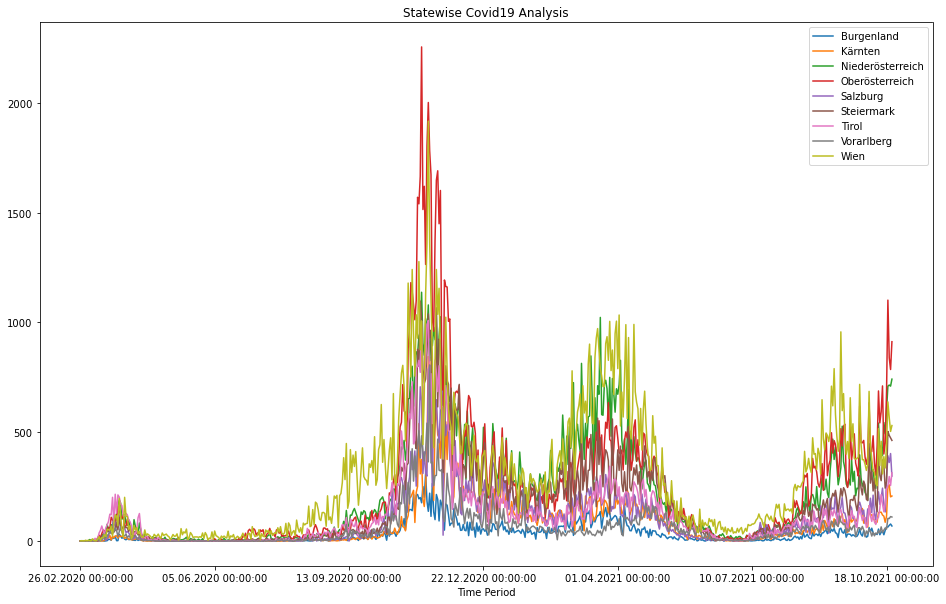

In [14]:
#statewise covid
covid_bur = covid[covid.BundeslandID == 1].plot(x = "Time", y = "AnzahlFaelle", label = "Burgenland", figsize=(16, 10))
covid_kar = covid[covid.BundeslandID == 2].plot(ax = covid_bur, x = "Time", y = "AnzahlFaelle", label = "Kärnten", figsize=(16, 10))
covid_no = covid[covid.BundeslandID == 3].plot(ax = covid_kar, x = "Time", y = "AnzahlFaelle", label = "Niederösterreich", figsize=(16, 10))
covid_oo = covid[covid.BundeslandID == 4].plot(ax = covid_no, x = "Time", y = "AnzahlFaelle", label = "Oberösterreich", figsize=(16, 10))
covid_sal = covid[covid.BundeslandID == 5].plot(ax = covid_oo, x = "Time", y = "AnzahlFaelle", label = "Salzburg", figsize=(16, 10))
covid_st = covid[covid.BundeslandID == 6].plot(ax = covid_sal, x = "Time", y = "AnzahlFaelle", label = "Steiermark", figsize=(16, 10))
covid_ti = covid[covid.BundeslandID == 7].plot(ax = covid_st, x = "Time", y = "AnzahlFaelle", label = "Tirol", figsize=(16, 10))
covid_vor = covid[covid.BundeslandID == 8].plot(ax = covid_ti, x = "Time", y = "AnzahlFaelle", label = "Vorarlberg", figsize=(16, 10))
covid_w = covid[covid.BundeslandID == 9].plot(ax = covid_vor, x = "Time", y = "AnzahlFaelle", label = "Wien", figsize=(16, 10))

plt.legend()
plt.title("Statewise Covid19 Analysis")
plt.xlabel("Time Period")
plt.show()

Seven days incidence in Burgenland, Steiermark and Wien.

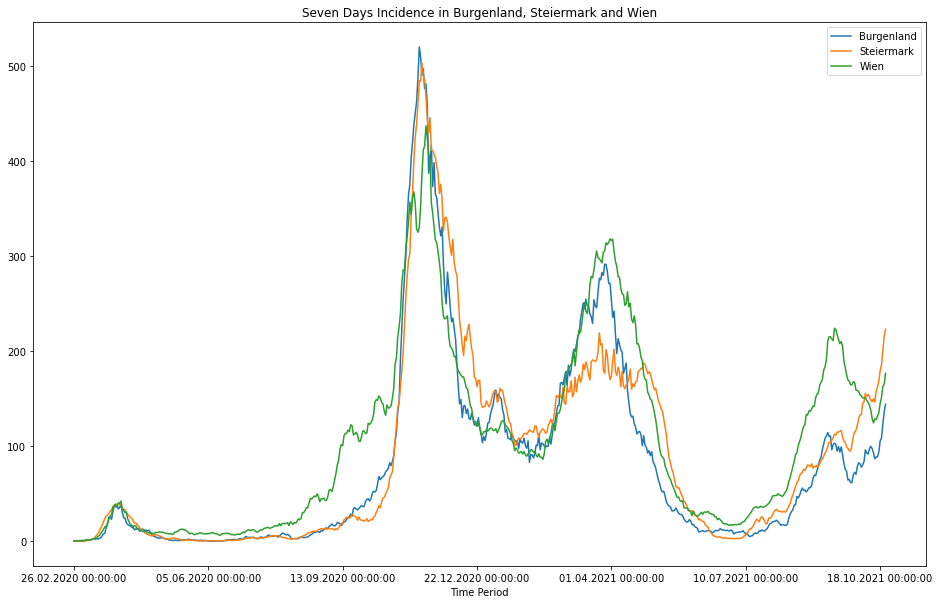

In [15]:
#sever days incidence in Burgenland, Steiermark and Wien
covid_bur = covid[covid.BundeslandID == 1].plot(x = "Time", y = "SiebenTageInzidenzFaelle", label = "Burgenland", figsize=(16, 10))
covid_st = covid[covid.BundeslandID == 6].plot(ax = covid_bur, x = "Time", y = "SiebenTageInzidenzFaelle", label = "Steiermark", figsize=(16, 10))
covid_w = covid[covid.BundeslandID == 9].plot(ax = covid_st, x = "Time", y = "SiebenTageInzidenzFaelle", label = "Wien", figsize=(16, 10))

plt.legend()
plt.title('Seven Days Incidence in Burgenland, Steiermark and Wien')
plt.xlabel("Time Period")
plt.show()